In [1]:
import 定日镜光学效率 as eff
import pandas as pd
import numpy as np
import test_multi
import e_mirror_rate as emr

In [2]:
#读取 附件.xlsx 中的数据
df = pd.read_excel('附件.xlsx',header=0)
df.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


In [3]:
#加入额外数据
#安装高度
df['安装高度z'] = 4
#尺寸
df['尺寸长l'] = 6
df['尺寸宽w'] = 6

df.head()

,x坐标 (m),y坐标 (m),安装高度z,尺寸长l,尺寸宽w
0,107.250,11.664,4,6,6
1,105.360,23.191,4,6,6
2,102.235,34.447,4,6,6
3,97.911,45.299,4,6,6
4,92.440,55.619,4,6,6


In [4]:
#转换为nddarray
mirrors = df.values
mirrors

array([[107.25 ,  11.664,   4.   ,   6.   ,   6.   ],
       [105.36 ,  23.191,   4.   ,   6.   ,   6.   ],
       [102.235,  34.447,   4.   ,   6.   ,   6.   ],
       ...,
       [334.636, -40.95 ,   4.   ,   6.   ,   6.   ],
       [336.233, -24.609,   4.   ,   6.   ,   6.   ],
       [337.032,  -8.21 ,   4.   ,   6.   ,   6.   ]])

## 计算效率

In [5]:

result_matrix = test_multi.range_result(mirrors[:, 0:2],8)
#print(result_matrix)

In [6]:

# Day=0
# hour=12


sum_tal = 0

phi=39.2*np.pi/180
for day in [-59,-28,0,31,61,92,122,153,183,214,245,275]:
    for hour in [9,10.5,12,13.5,15]:
        ps,tal,per=eff.E_field(mirrors,result_matrix,day,hour,phi,3)
        sum_tal +=tal
#每月年平均


# ps,tal,per=eff.E_field(mirrors,result_matrix,day,hour,phi,3)

# print("总功率",tal)
# print("单位面积功率",per)


d:\python code\23cmfsh\ColumnProjection.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(plane_vector[1]/plane_vector[0])


In [7]:

#找到功率最小的镜子
min_index = np.argmin(ps)
print("最小功率镜子",min_index,ps[min_index],mirrors[min_index])


最小功率镜子 1734 0.09794184298770275 [ 293.996 -164.998    4.       6.       6.   ]


# 画图

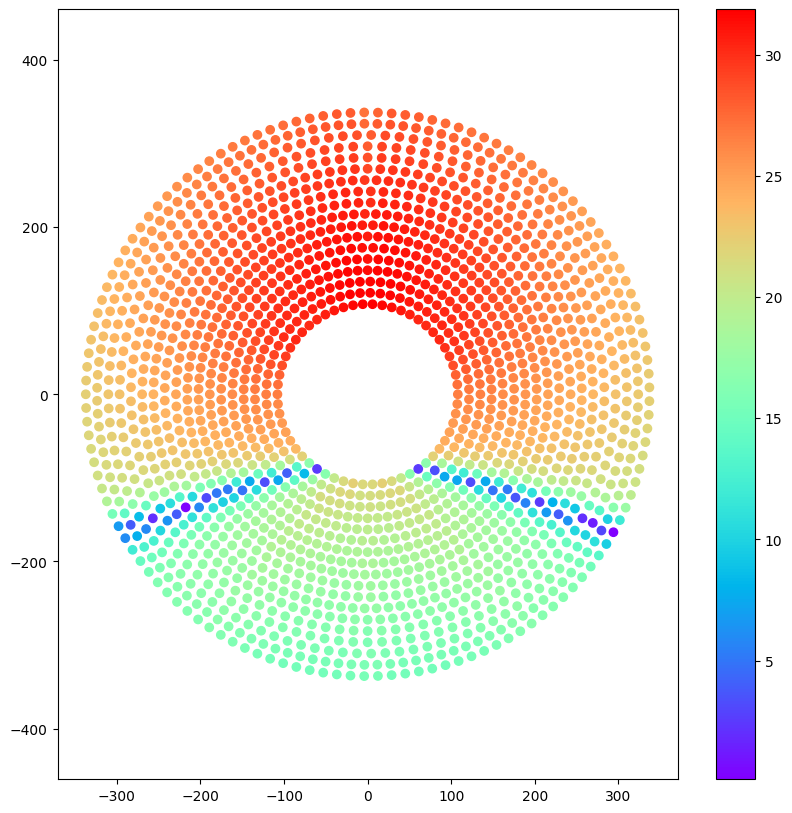

In [8]:
#import seaborn as sns
import matplotlib.pyplot as plt

#绘制功率密度图
#按镜子x,y坐标画出功率密度图
#x,y坐标
x = mirrors[:,0]
y = mirrors[:,1]
#功率密度
ps = ps
#绘图
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=ps,cmap='rainbow')
plt.colorbar()
#等比
plt.axis('equal')
plt.show()
